In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from generate_simulation import *
import vclamp_evaluator_HMMtoHH as vcl_ev
import general_plotter as plotter
from generate_simulation import *
import eval_helper as eh
import curve_fitting as cf

#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_med.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

--No graphics will be displayed.


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg    	std    	min     	max        
1  	500   	497797 	918252 	59.0459 	7.52716e+06
2  	500   	464818 	875949 	58.7907 	7.52716e+06
3  	500   	287065 	706992 	30.8963 	2.04464e+06
4  	500   	208689 	616721 	14.5966 	2.05032e+06
5  	500   	165620 	555959 	14.5966 	2.04202e+06
6  	500   	77966.7	389627 	14.5966 	2.04046e+06
7  	500   	57448.6	336162 	14.5966 	2.0391e+06 
8  	500   	104411 	448280 	14.5966 	2.04096e+06
9  	500   	57826.8	336983 	14.5966 	2.1088e+06 
10 	500   	14850.7	170001 	14.5966 	2.04798e+06
11 	500   	12614.2	157386 	9.12016 	2.03959e+06
12 	500   	12969.6	158975 	13.2953 	2.09885e+06
13 	500   	12693.7	157373 	14.5966 	2.03893e+06
14 	500   	8798.42	130572 	11.5525 	2.09881e+06
15 	500   	12824.4	157431 	11.5736 	2.04133e+06
16 	500   	6619.71	111464 	8.8871  	2.03889e+06
17 	500   	10642.4	144635 	10.0428 	2.09871e+06
18 	500   	23179.6	214357 	8.52785 	2.09871e+06
19 	500   	13042.9	159730 	8.52785 	2.09871e+06
20 	500   	17185.8	184263 	6.72295 	2.09

In [6]:
def scale(val, src):
    """
    scale val in the 0,1 range when given lb and ub
    """
    return ((val - src[0]) / (src[1]-src[0])) 

In [7]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'

def get_place_in_range(opt_ps,csv_file,print_flg = False):
    p_names = []
    p_fact = []
    param_list = eh.read_params_range(csv_file)
    for ind,p_name in enumerate(param_list.keys()):
        tmp = param_list[p_name]
        lb = tmp[1]
        ub = tmp[2]
        fact = scale(opt_ps[ind],[lb,ub])
        p_names.append(p_name)
        p_fact.append(fact)
        if print_flg:
            print(f'{p_name} - lb:{lb} ub:{ub} p:{fact}')
    return p_names,p_fact
    

In [8]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [334.4331967978862, 0.04761254947155932, 5.447122109492366, 0.12044929513636574, 392.24004086140474, 0.11047544041654586, 6.954686364170016, 0.015593497476071045, 29.33212813820402, 0.20420364846320443, 9.65622980569384, 0.008421784146833531, 1.7272368555792605, 1.3316364039002617, 0.12437758979968834, 8.813317900102527, 2.308912762677156, 0.005461538354530336, -24.000688864816514, -27.758668974996354, 4559.119248809896, 3.139644564885776, 6.360655179514854]
[inact_err, act_err]: (0.0014984075433299375, 0.04254638196778872, 0.1375783938182567, 0.01768191532850184, 0.061338070461806234, 0.600000000000017, 0.019909339829873533)


In [9]:
pnames,pfactors = get_place_in_range(p,csv_file)

a1_0 - lb:9.17 ub:1000.0 p:0.34193423493910674
a1_1 - lb:0.0 ub:2.0 p:0.061885580138453314
b1_0 - lb:0.0 ub:10.0 p:0.5327659679672808
b1_1 - lb:0.0177 ub:0.4424 p:0.1621762425469933
a2_0 - lb:0.0 ub:1000.0 p:0.39224004086140474
a2_1 - lb:0.0 ub:3.0 p:0.03682514680551529
b2_0 - lb:0.113 ub:10.0 p:0.563320986604028
b2_1 - lb:0.0 ub:0.1 p:0.14911939947055863
a3_0 - lb:0.0 ub:359.0595 p:0.040171151515327276
a3_1 - lb:0.0132 ub:0.3297 p:0.4028261202975266
b3_0 - lb:0.0 ub:2.0 p:4.82811490284692
b3_1 - lb:0.0 ub:0.1 p:0.0834540481838452
bh_0 - lb:0.0 ub:4.0 p:0.019364720295463378
bh_1 - lb:0.0 ub:1.445 p:0.921356778217505
bh_2 - lb:0.0139 ub:0.348 p:0.33067222328550844
ah_0 - lb:0.0 ub:10.0 p:0.8813317900102527
ah_1 - lb:0.1 ub:1000.0 p:0.0022091336760447604
ah_2 - lb:0.0 ub:0.1 p:0.13273883506183437
vShift - lb:-60.0 ub:60.0 p:0.30023739722741716
vShift_inact - lb:-60.0 ub:60.0 p:0.25153860201293693
maxrate - lb:1600.0 ub:40000.0 p:0.1299941872449192
ahfactor - lb:0.2 ub:5.0 p:0.83699036135

[Text(0, 0, 'a1_0'),
 Text(0, 1, 'a1_1'),
 Text(0, 2, 'b1_0'),
 Text(0, 3, 'b1_1'),
 Text(0, 4, 'a2_0'),
 Text(0, 5, 'a2_1'),
 Text(0, 6, 'b2_0'),
 Text(0, 7, 'b2_1'),
 Text(0, 8, 'a3_0'),
 Text(0, 9, 'a3_1'),
 Text(0, 10, 'b3_0'),
 Text(0, 11, 'b3_1'),
 Text(0, 12, 'bh_0'),
 Text(0, 13, 'bh_1'),
 Text(0, 14, 'bh_2'),
 Text(0, 15, 'ah_0'),
 Text(0, 16, 'ah_1'),
 Text(0, 17, 'ah_2'),
 Text(0, 18, 'vShift'),
 Text(0, 19, 'vShift_inact'),
 Text(0, 20, 'maxrate'),
 Text(0, 21, 'ahfactor'),
 Text(0, 22, 'bhfactor')]

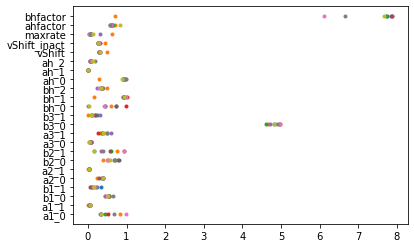

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
yaxis = range(len(pnames))
for p in hof[-10:-2]:
    pnames,pfactors = get_place_in_range(p,csv_file)
    ax.plot(pfactors,yaxis,'.')
pnames,pfactors = get_place_in_range(hof[-1],csv_file,True)
ax.plot(pfactors,yaxis,'.')
ax.set_yticks(yaxis)
ax.set_yticklabels(pnames)


In [11]:
p = best_hof

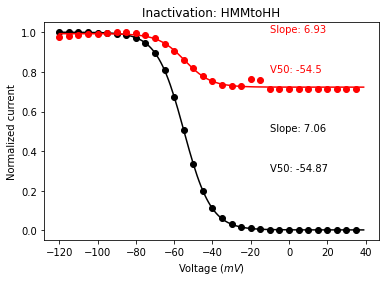

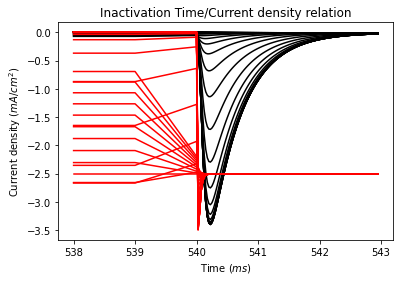

In [12]:
plotter.plot_inact(None, 'na16', False,p,'na12mut8st',True,"./Plots_Folder/jinan_testInact.pdf", "HMMtoHH")

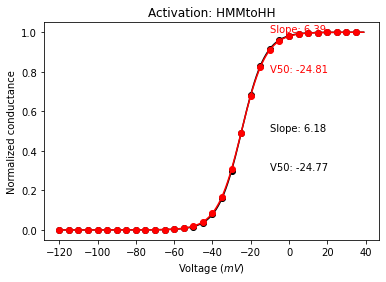

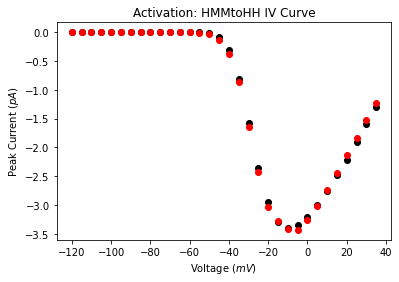

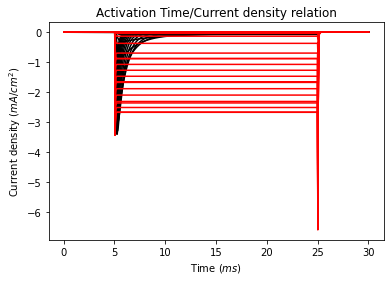

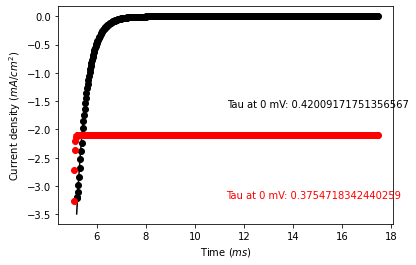

In [13]:
plotter.plot_act(None,'na16' , False,p,'na12mut8st',True,"./Plots_Folder/jinan_test.pdf", "HMMtoHH")

# Test HH Target data

In [14]:
wild_data = {}
# Getting objective base values for HH model.
is_HMM = False 
# Create genSim objects

act_obj = Activation_general(channel_name='na16')
tau0 = act_obj.get_Tau_0mV()
act_obj = Activation_general(channel_name='na16')
act_obj.genActivation()
peak_amp = act_obj.find_peak_amp([14, 33])
time_to_peak = act_obj.find_time_to_peak([14, 33])
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
inact_obj = Inactivation_general(channel_name='na16')
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
wild_data['tau0'] = tau0
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)



{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.87287065464149, 'ssi_slope': 7.058770252794946, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]}


In [15]:
sf = evaluator.score_calculator
print(evaluator.wild_data)

{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.87287065464149, 'ssi_slope': 7.058770252794946, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]}


# Test Scoring

In [16]:
errors = evaluator.evaluate_with_lists(best_hof)
print(errors)

(0.0014984075433299375, 0.04254638196778872, 0.1375783938182567, 0.01768191532850184, 0.061338070461806234, 0.600000000000017, 0.019909339829873533)


In [17]:


objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
act_obj = Activation_general(channel_name='na12mut8st')
inact_obj = Inactivation_general(channel_name='na12mut8st')
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [18]:
sf.dv_half_act_diff
sf.gv_slope_diff

'100'

In [19]:
objectives=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
try:
    gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
    ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
    # y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
    #print('gv_slope: ' + str(gv_slope))
    #print('v_half_act: ' + str(v_half_act))
    #print('ssi_slope: ' + str(ssi_slope))
    #print('v_half_inact: ' + str(v_half_inact))

except ZeroDivisionError:
    print('Zero Division Error************')
    error_val = []
    for i in range(len(objectives)):
        error_val.append(1000)


errors = []
if 'v_half_act' in objectives:
    vhalf_act_error = sf.dv_half_act(sf.dv_half_act_diff, v_half_act)
    errors.append(vhalf_act_error)
if 'gv_slope' in objectives:
    gv_slope_error = self.gv_slope(sf.gv_slope_diff, gv_slope)
    errors.append(gv_slope_error)
if 'v_half_ssi' in objectives:
    v_half_ssi_error = self.dv_half_ssi(sf.dv_half_ssi_diff, v_half_inact)
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objectives:
    ssi_slope_error = self.ssi_slope(sf.ssi_slope_diff, ssi_slope)
    errors.append(ssi_slope_error)
if 'peak_current' in objectives:
    peak_amp_errors = self.calc_peak_amp_err(act_obj)
    errors.append(peak_amp_errors)
if 'ttp' in objectives:
    time_to_peak_error = self.calc_ttp_err(act_obj)
    errors.append(time_to_peak_error)
if 'tau0' in objectives:
    tau0_error = self.calc_tau0_err(act_obj)
    errors.append(tau0_error)

NameError: name 'self' is not defined

In [ ]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is: {peak_amp} WT:{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is: {time_to_peak} WT:{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")


In [ ]:
np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])


In [ ]:
print(act_obj.ipeak_vec)

In [ ]:
cf.calc_act_obj(act_obj)

In [ ]:
print(act_obj.ipeak_vec[12])

In [ ]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

In [ ]:
print(act_obj.t_vec[np.argmin(i12)])

In [ ]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

In [ ]:
print(best_hof)

In [ ]:
act_obj = Activation_general(channel_name='na12mut8st')
act_obj.genActivation()
time_to_peak = act_obj.find_time_to_peak([14,33])
time_to_peak_error = np.sum([np.abs(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])

In [ ]:
print(time_to_peak)

In [ ]:
print(evaluator.wild_data['time_to_peak'])


In [ ]:
act_obj = Activation_general(channel_name='na12mut8st')
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
act_obj.clamp(0)

In [ ]:
act_obj.find_ipeaks()